In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

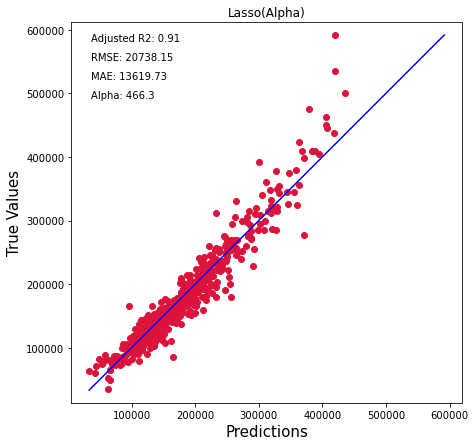

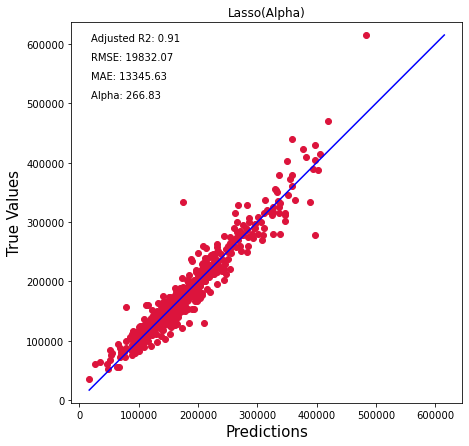

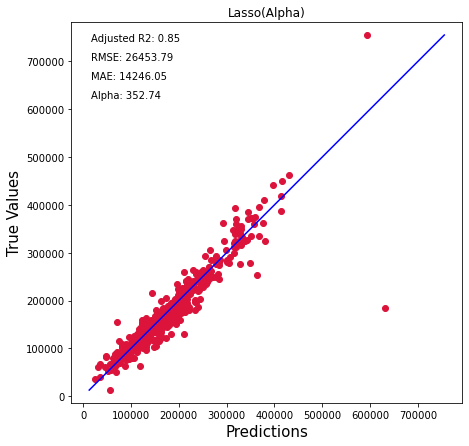

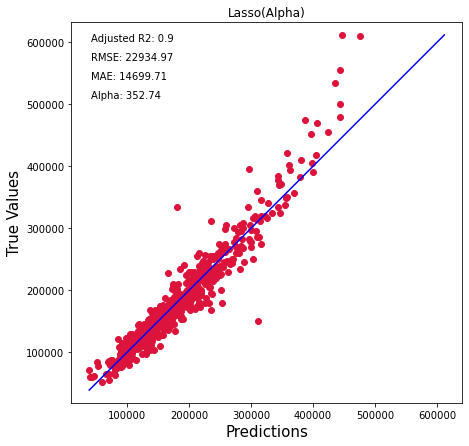

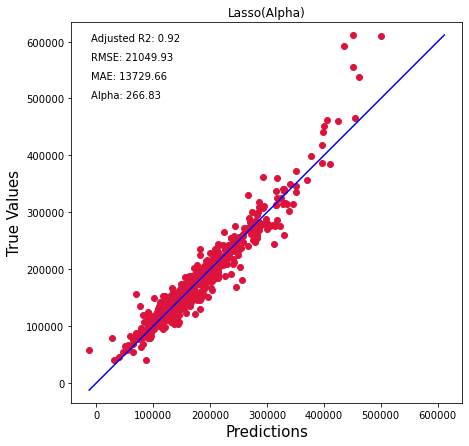

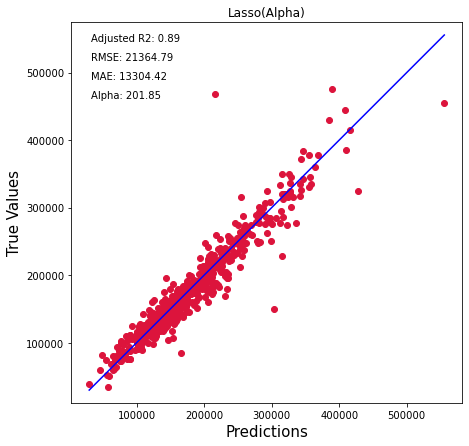

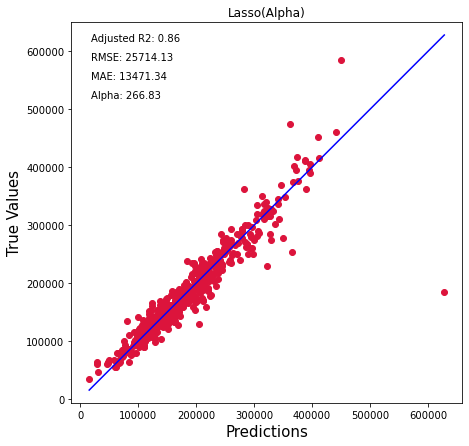

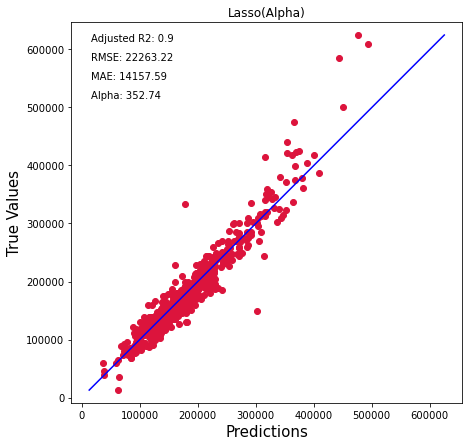

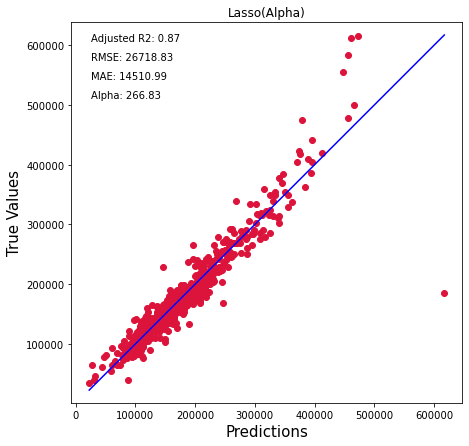

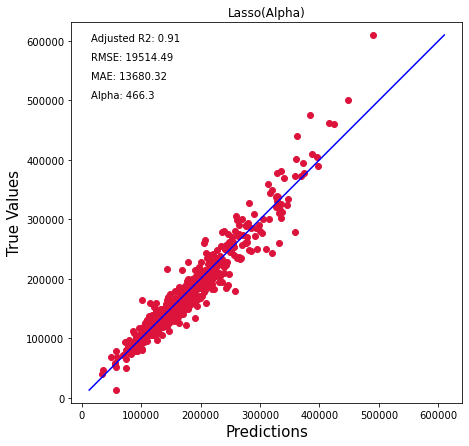

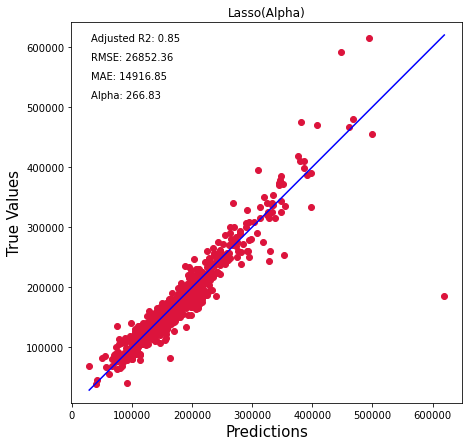

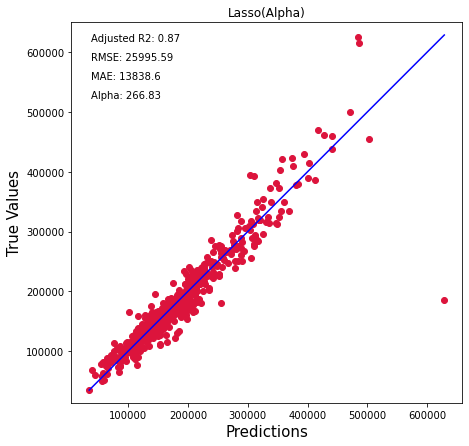

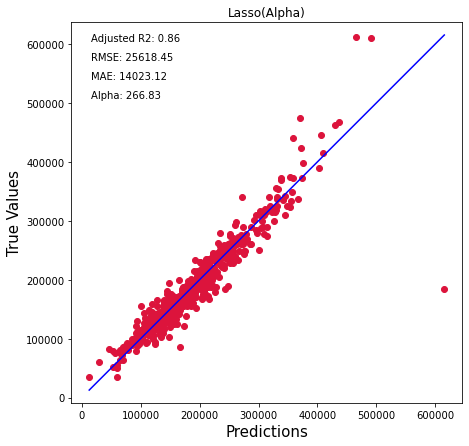

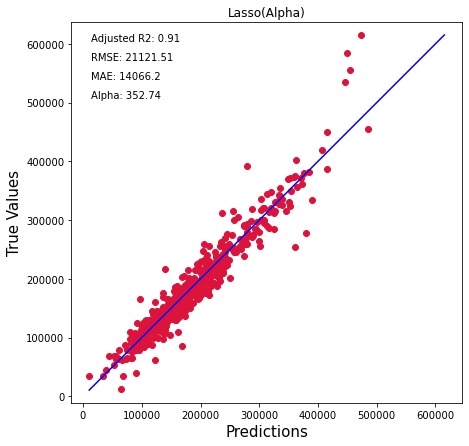

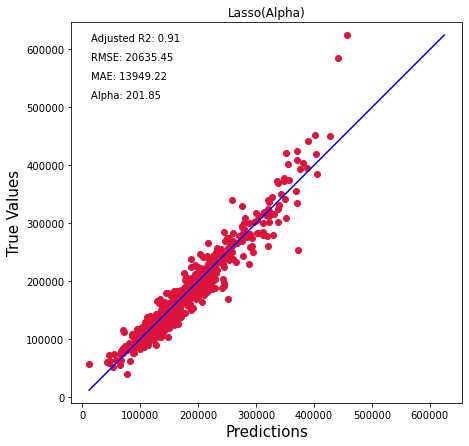

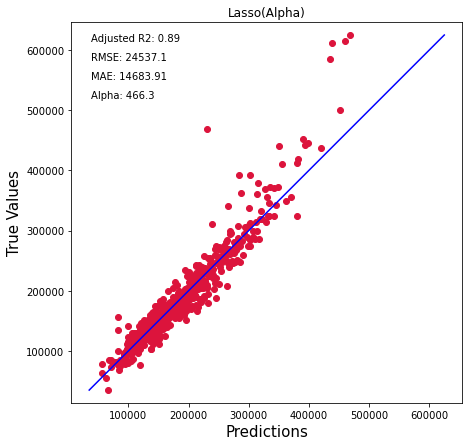

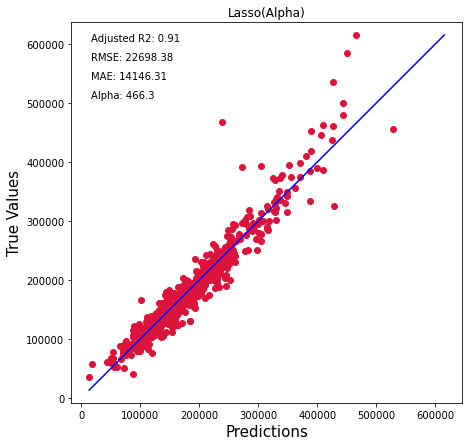

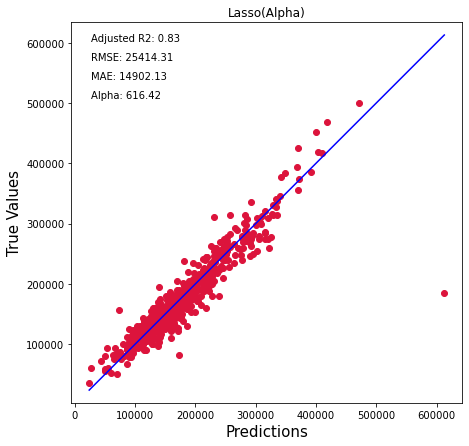

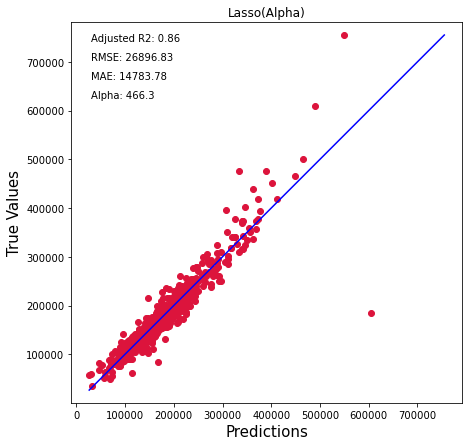

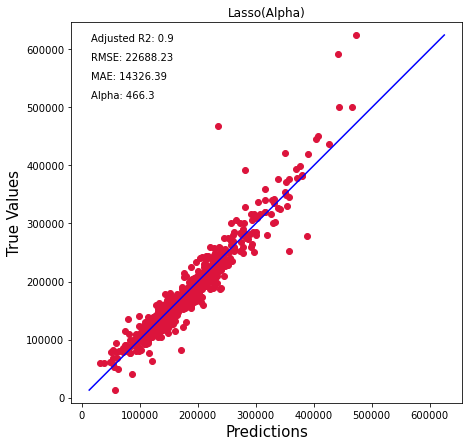

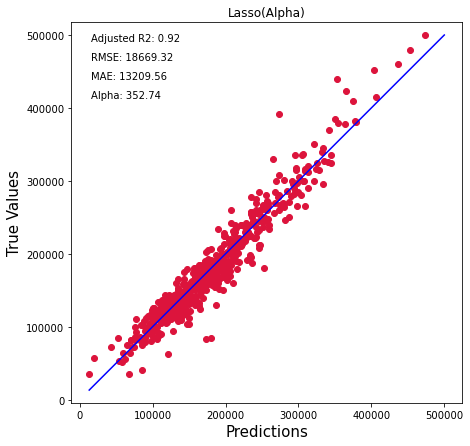

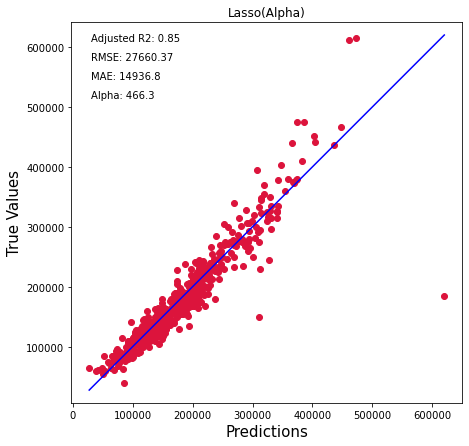

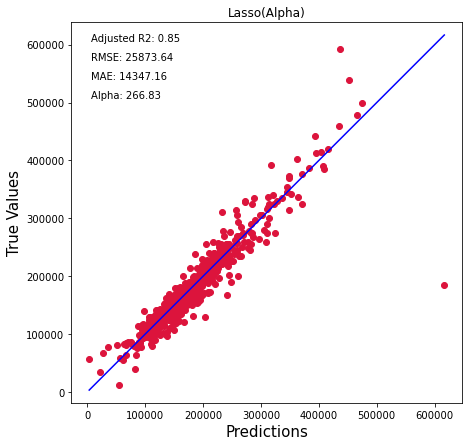

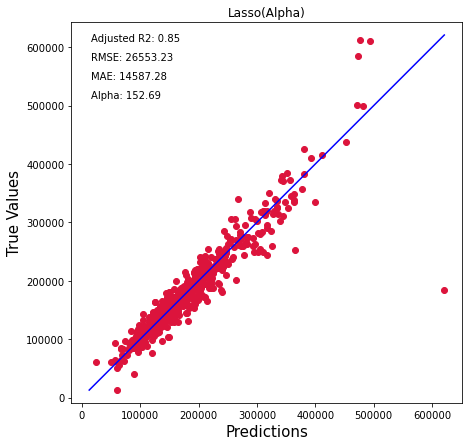

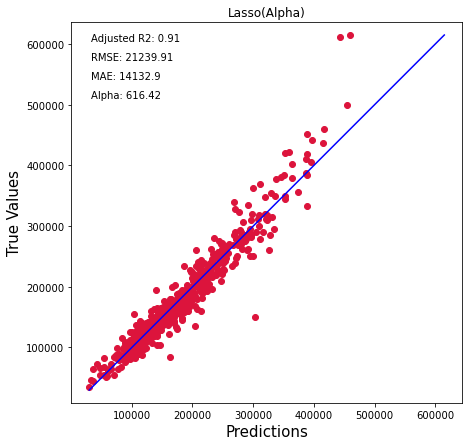

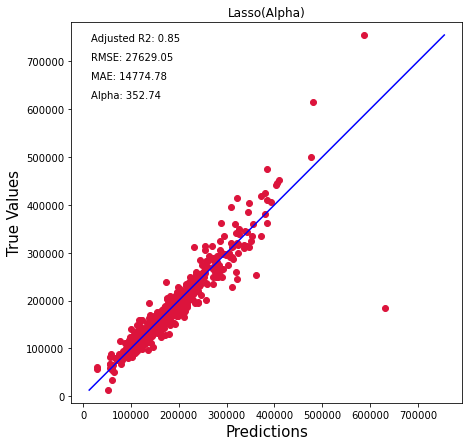

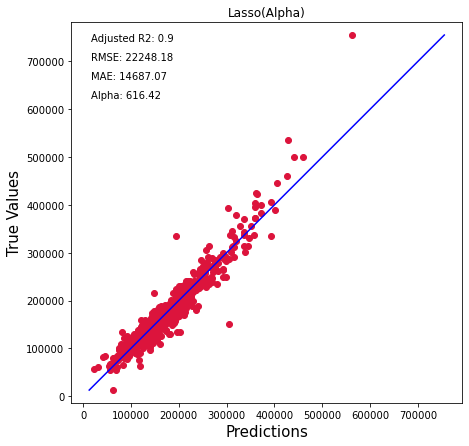

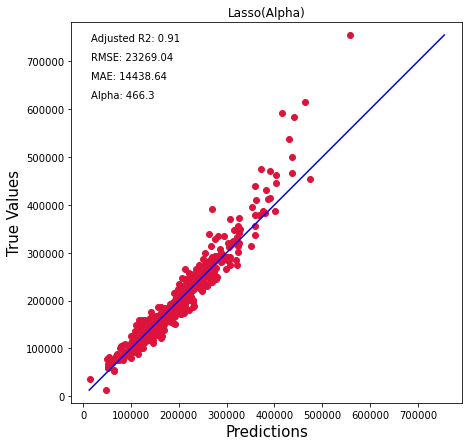

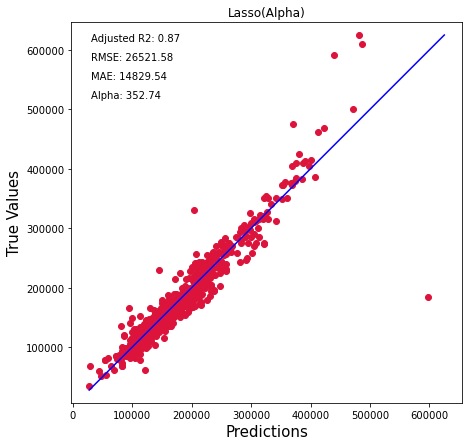

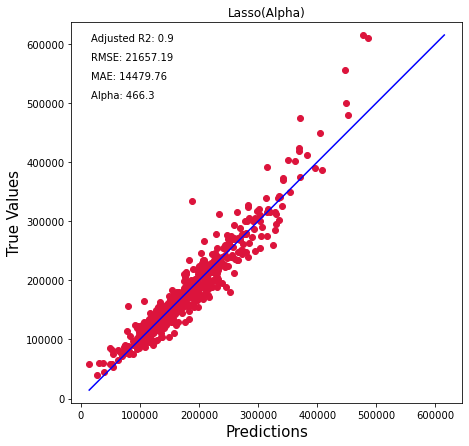

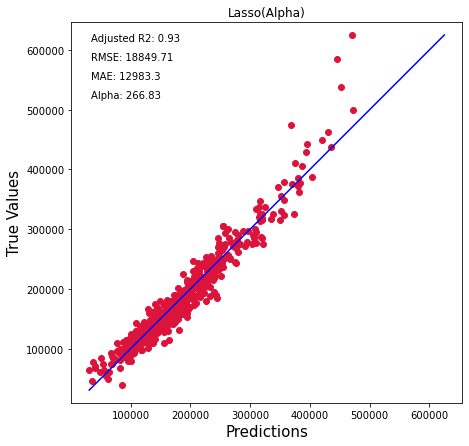

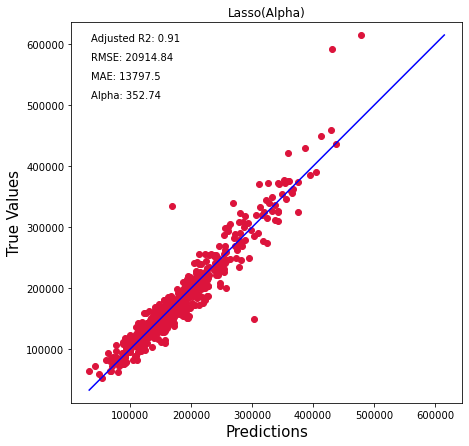

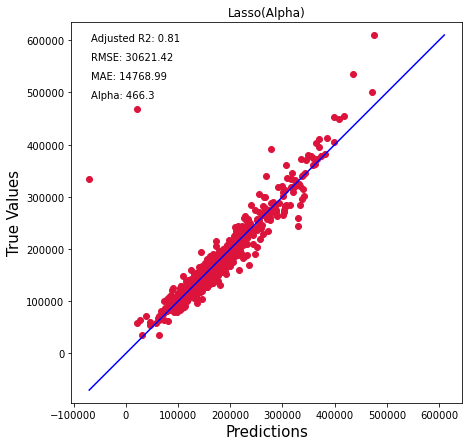

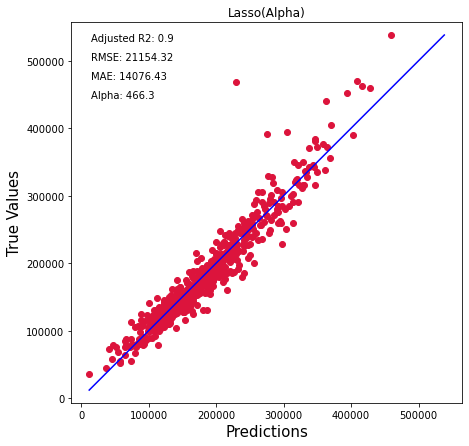

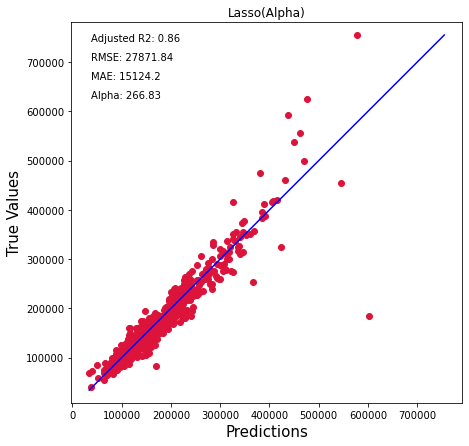

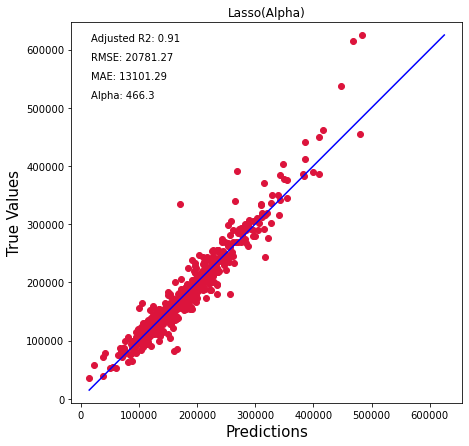

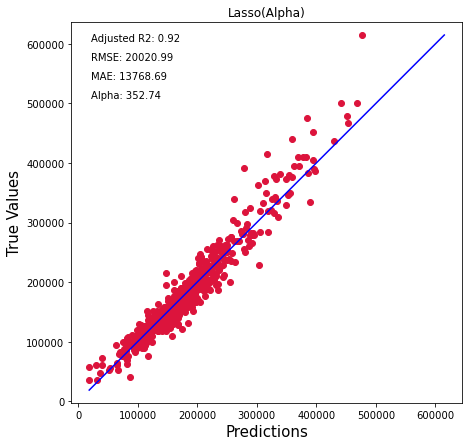

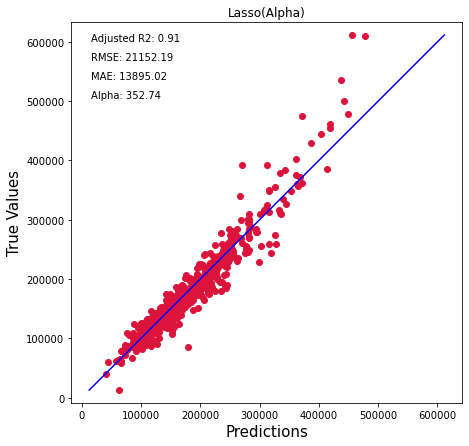

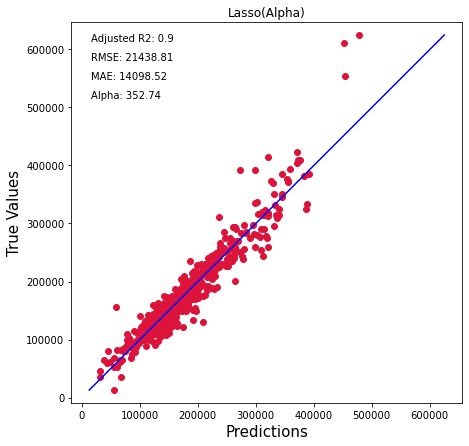

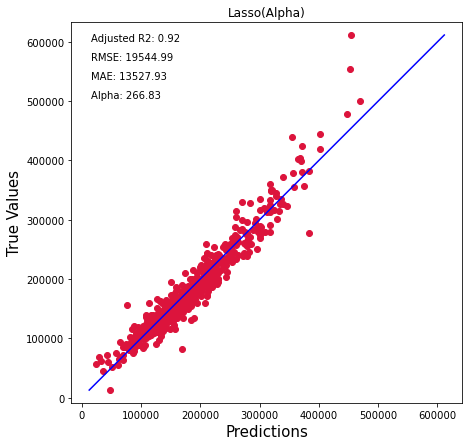

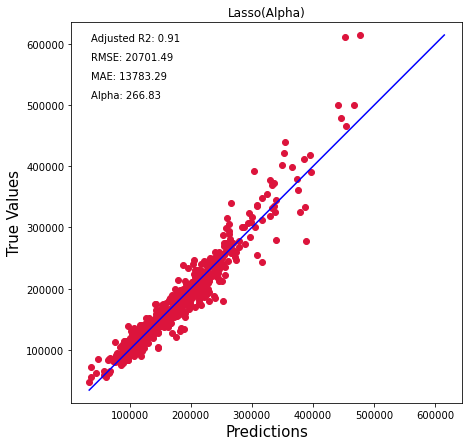

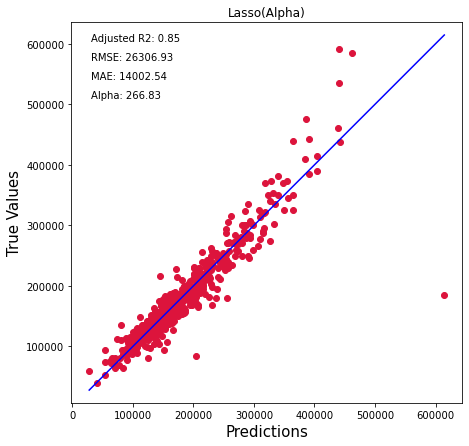

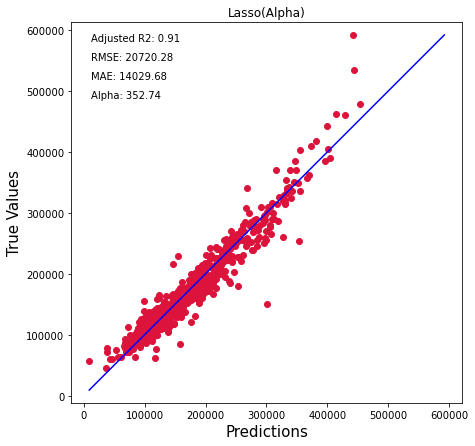

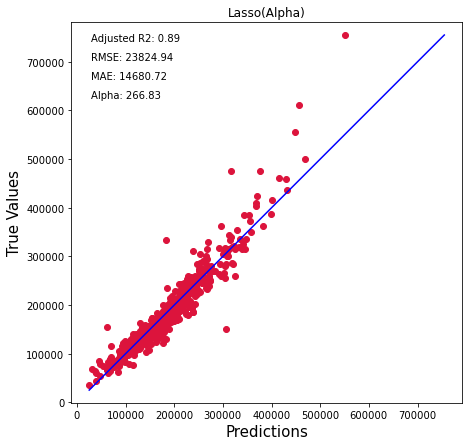

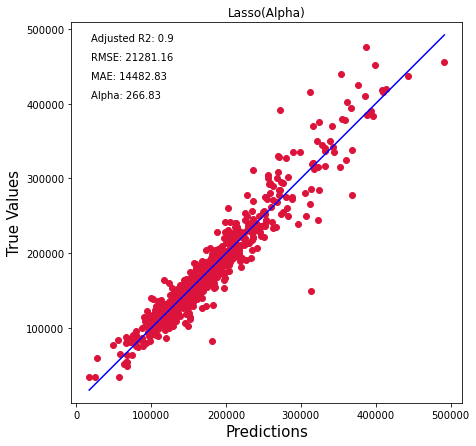

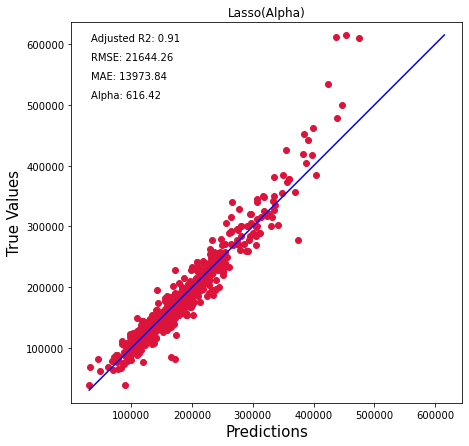

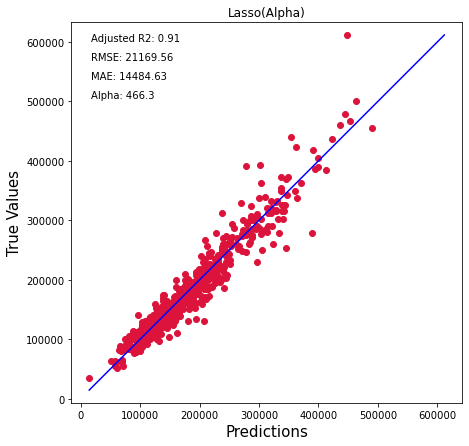

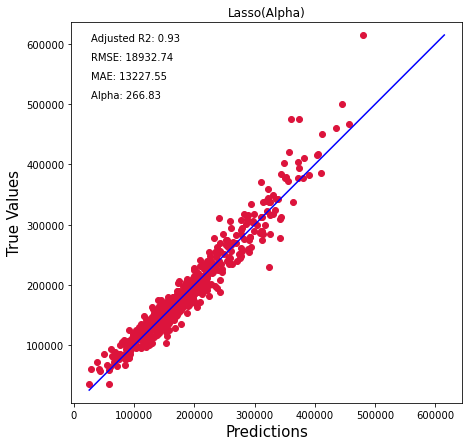

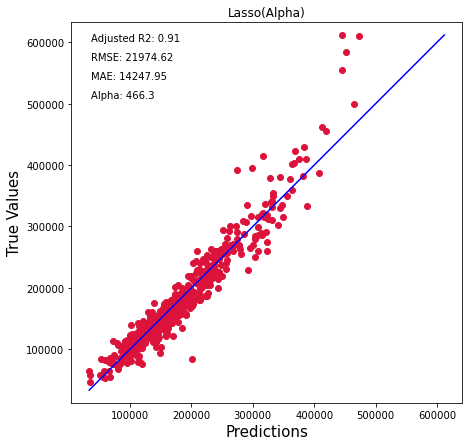

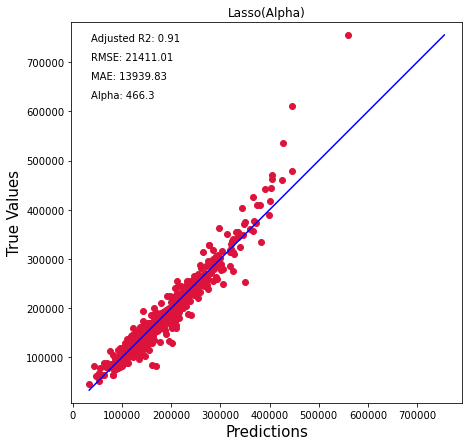

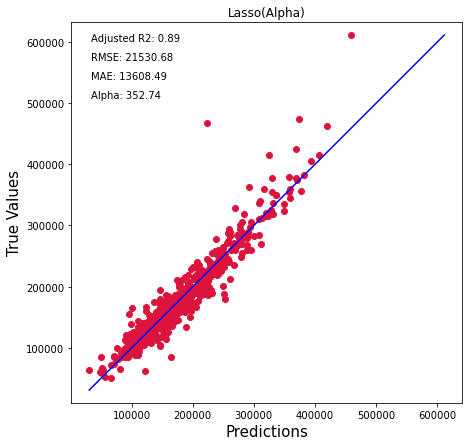

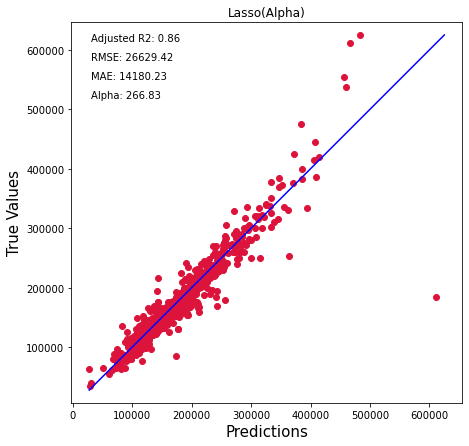

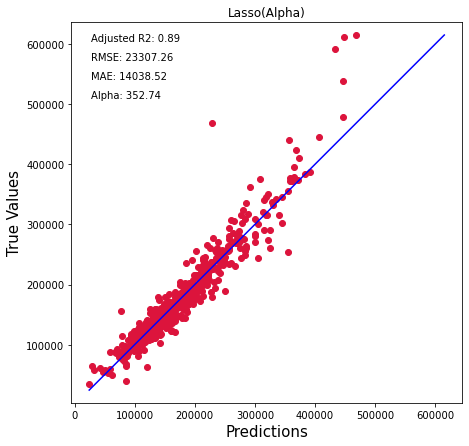

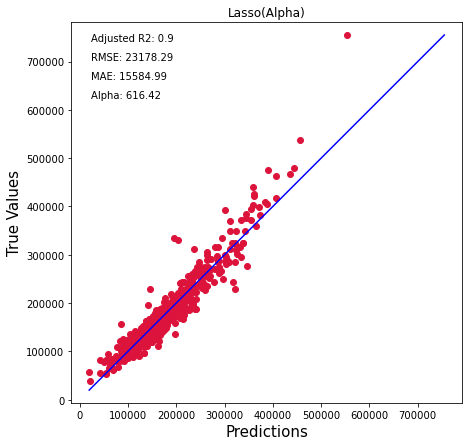

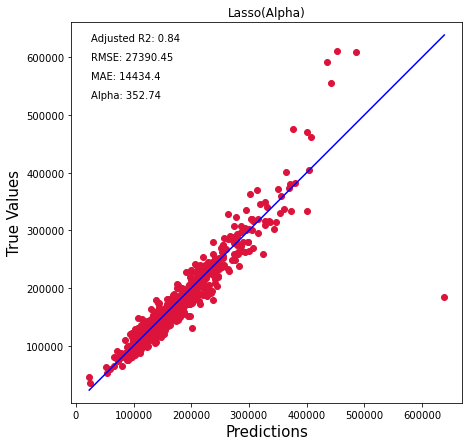

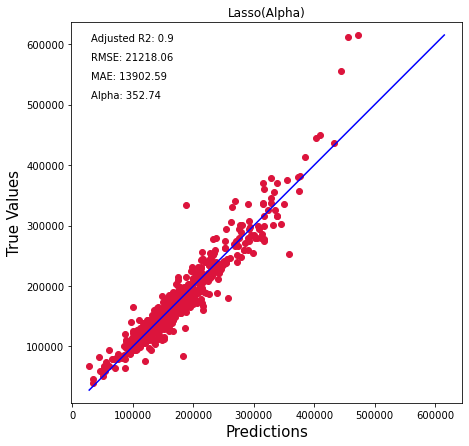

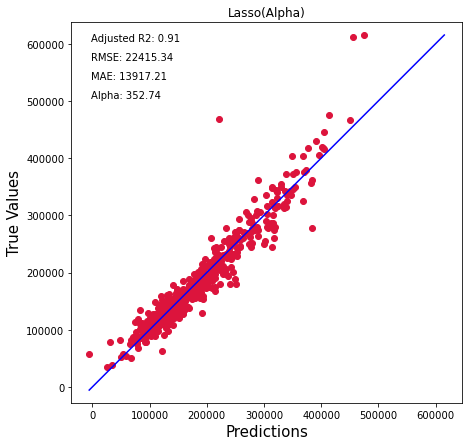

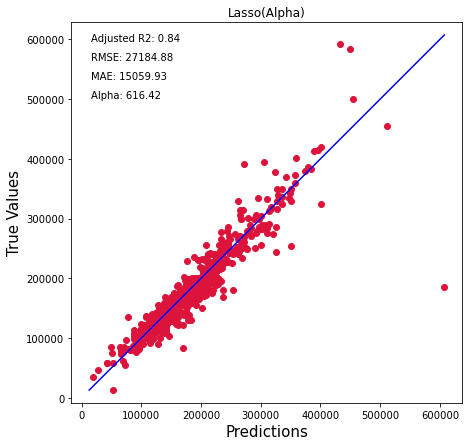

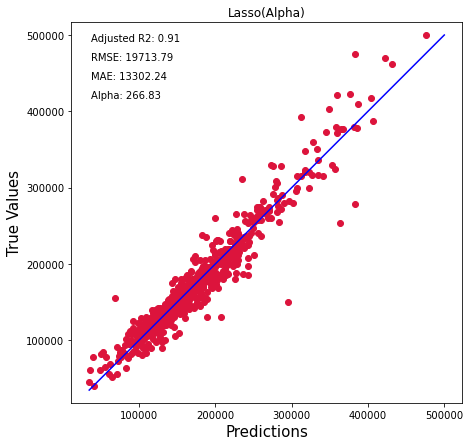

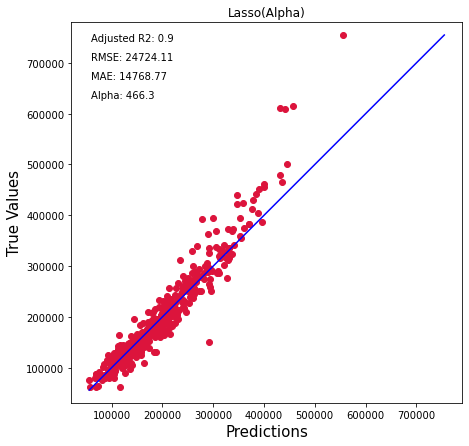

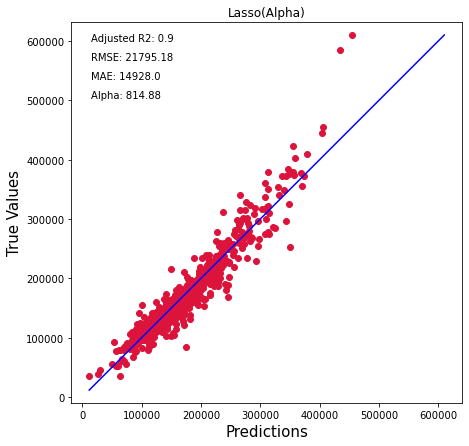

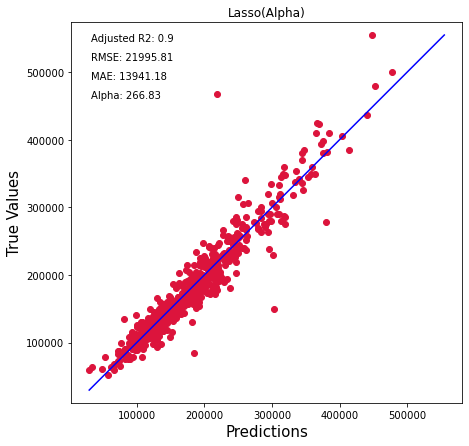

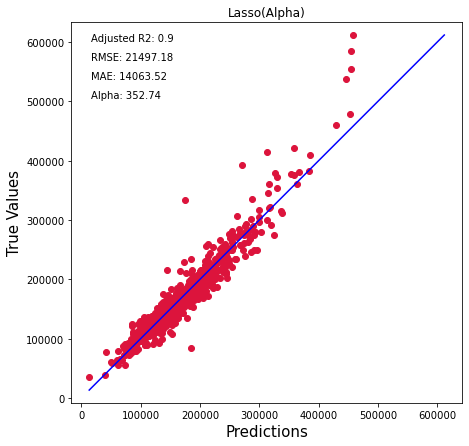

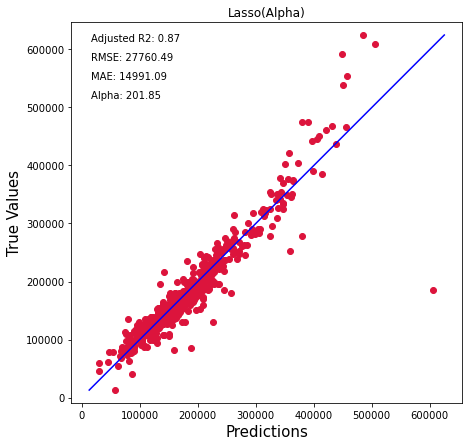

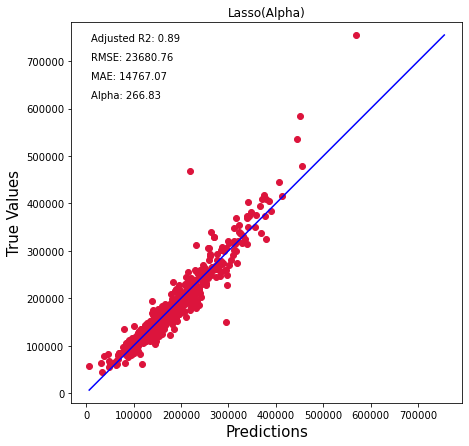

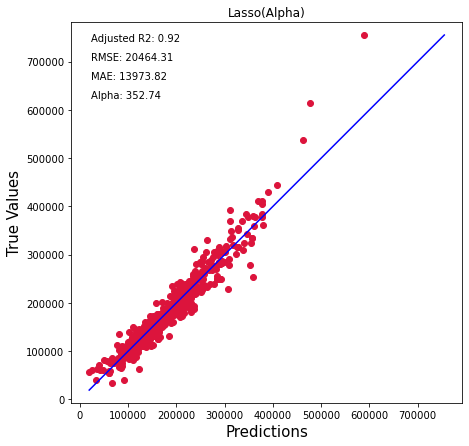

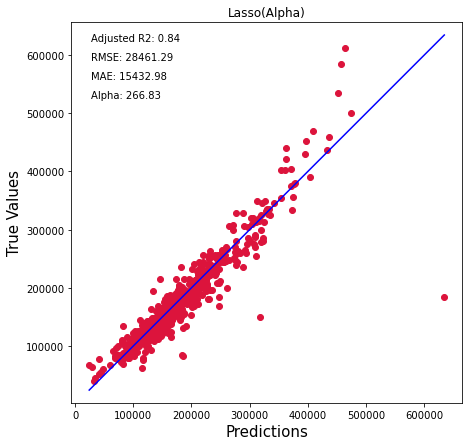

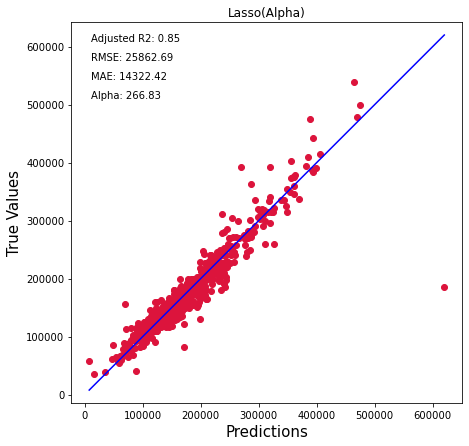

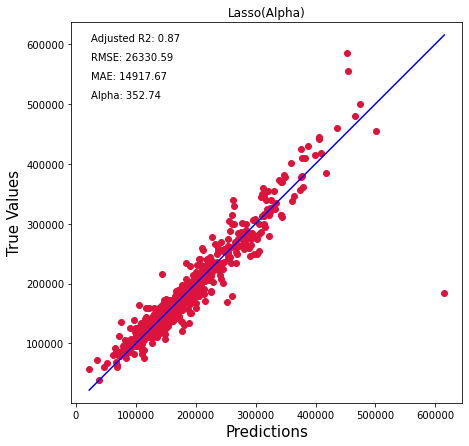

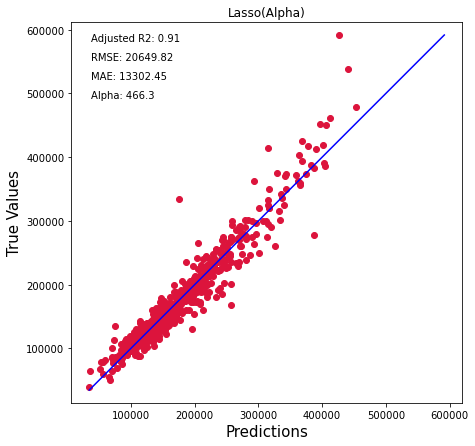

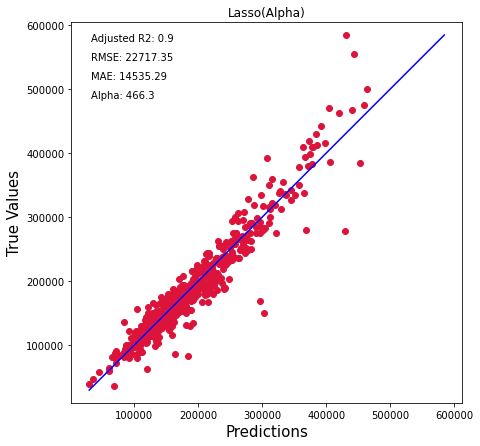

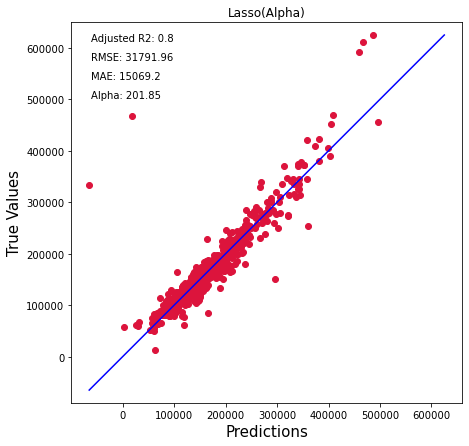

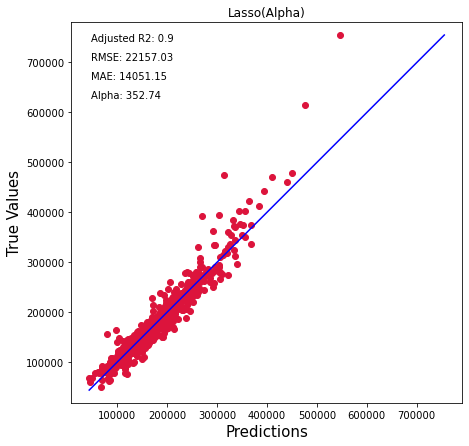

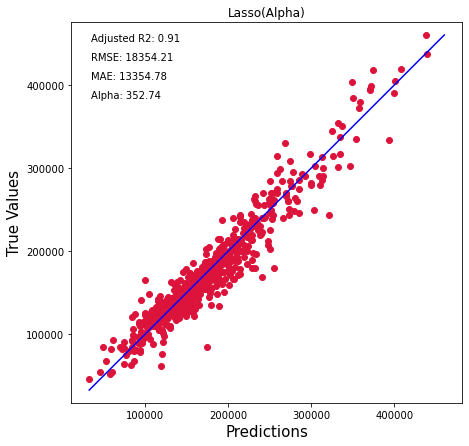

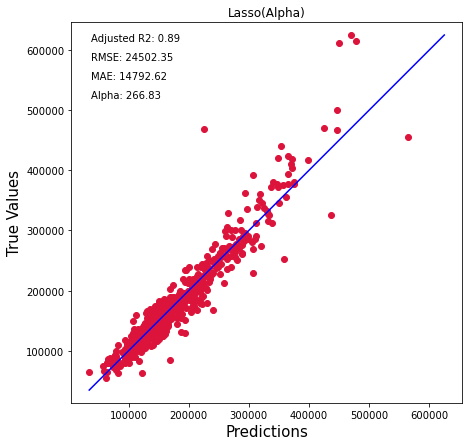

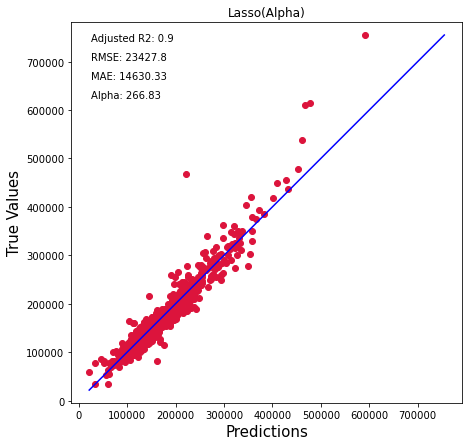

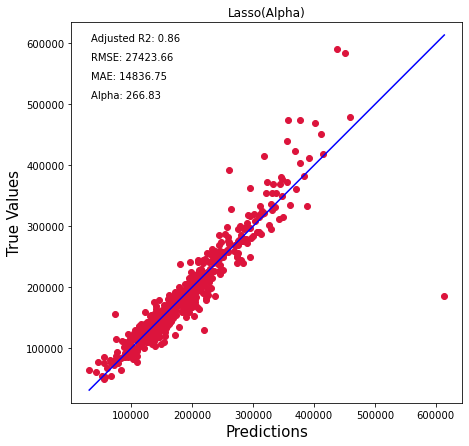

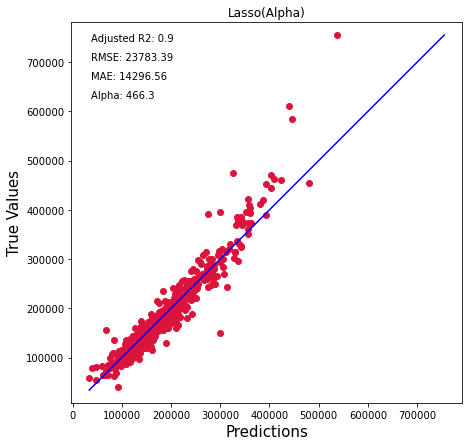

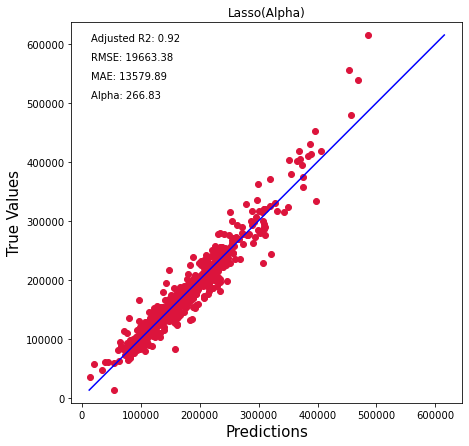

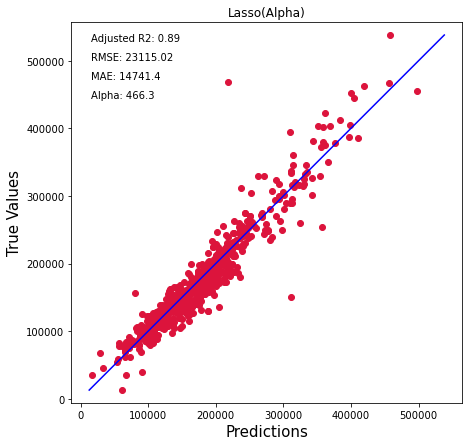

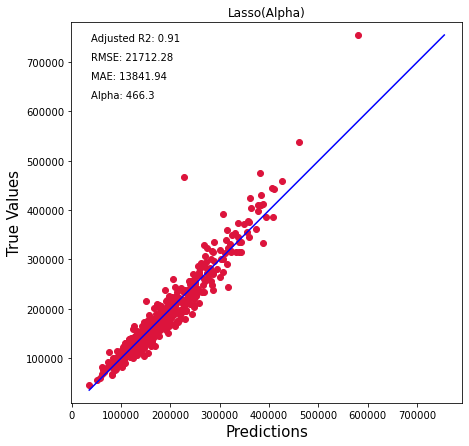

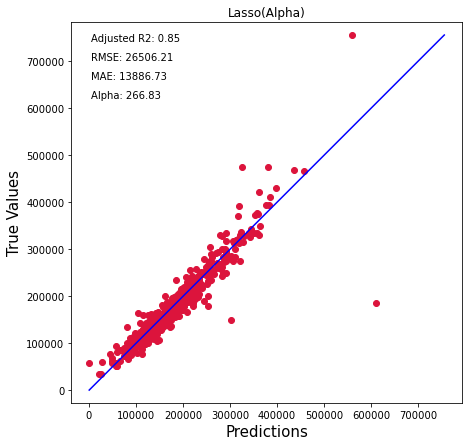

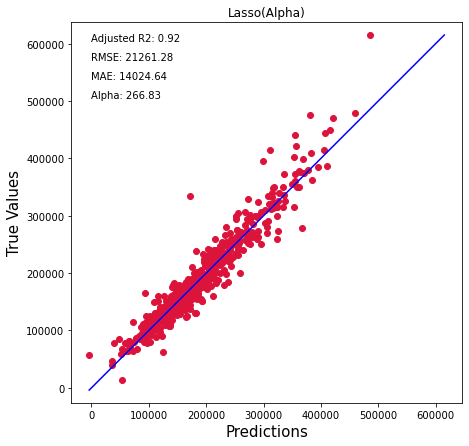

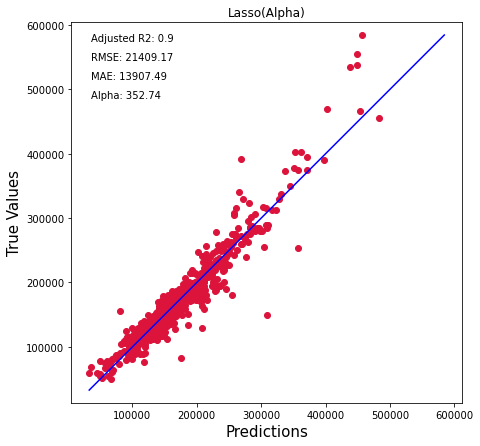

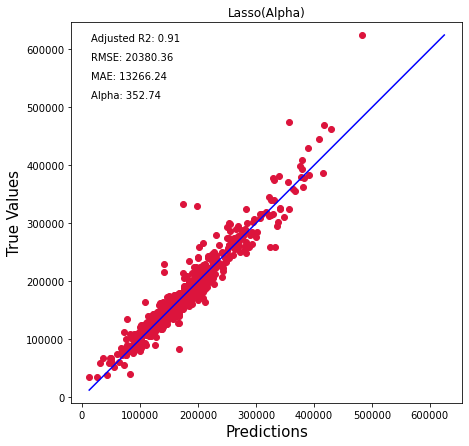

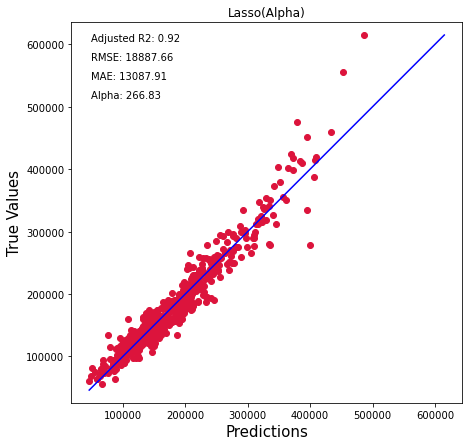

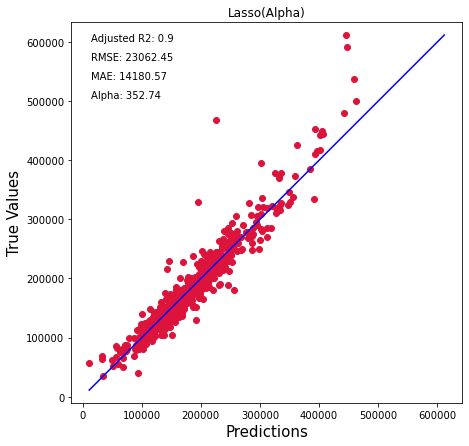

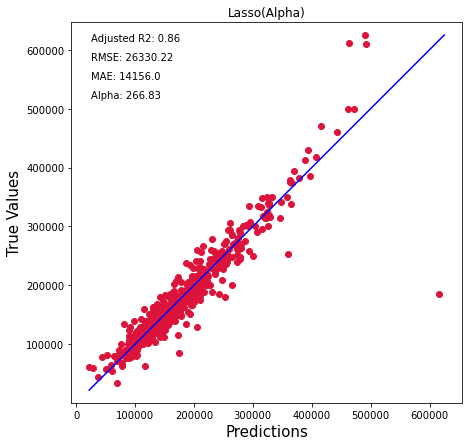

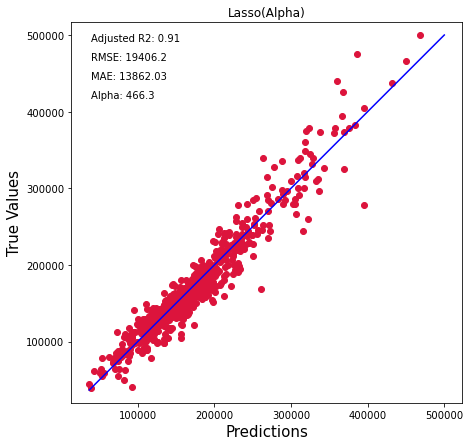

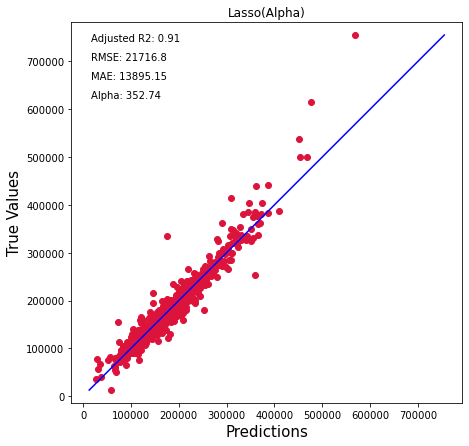

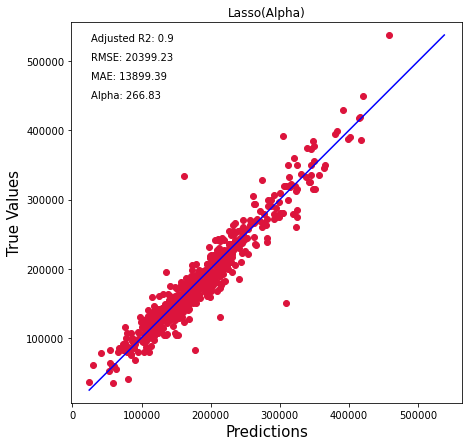

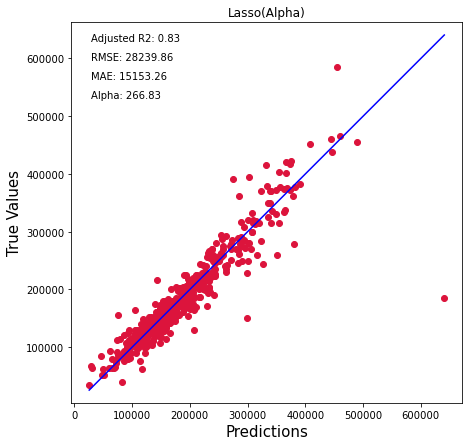

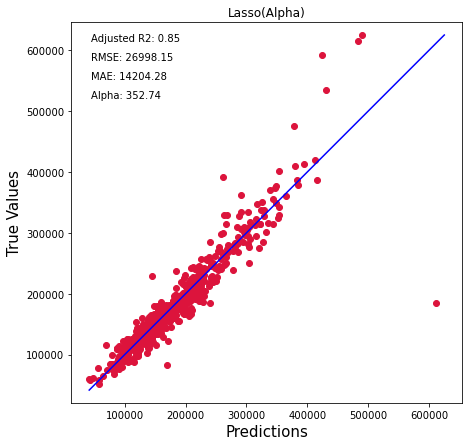

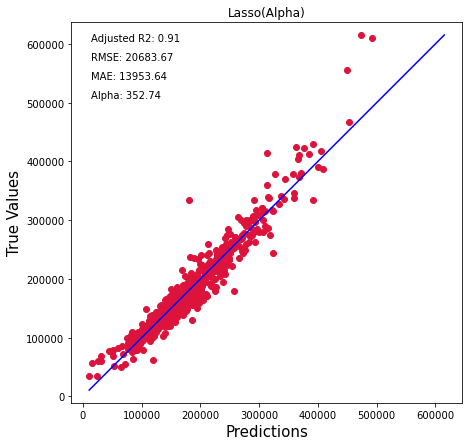

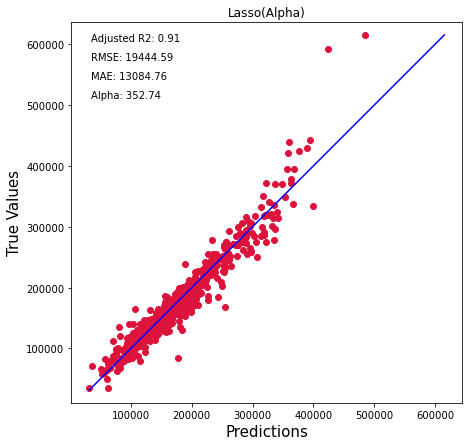

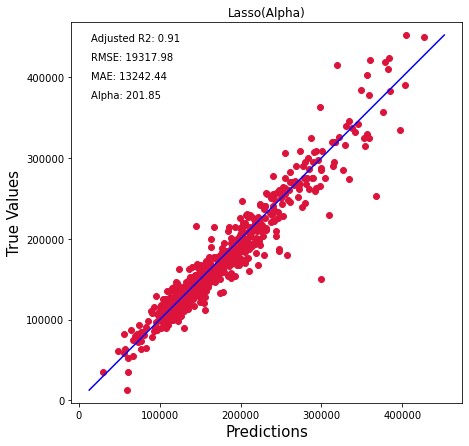

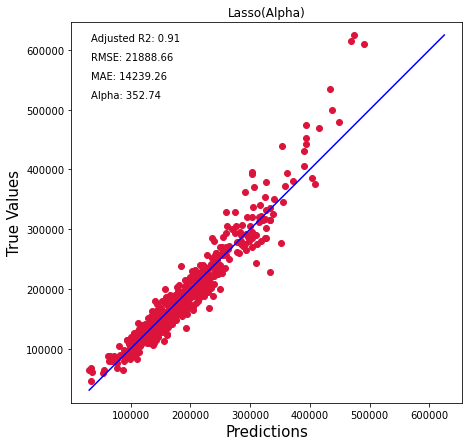

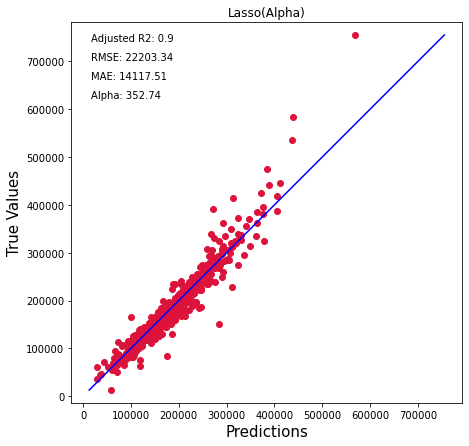

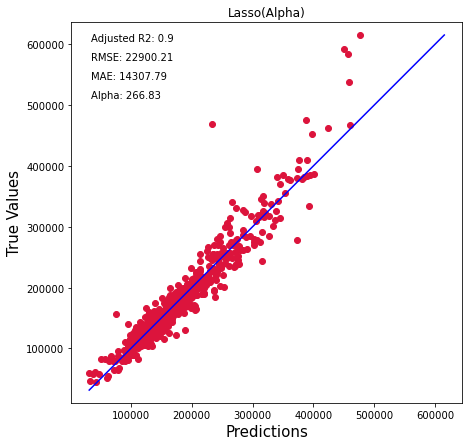

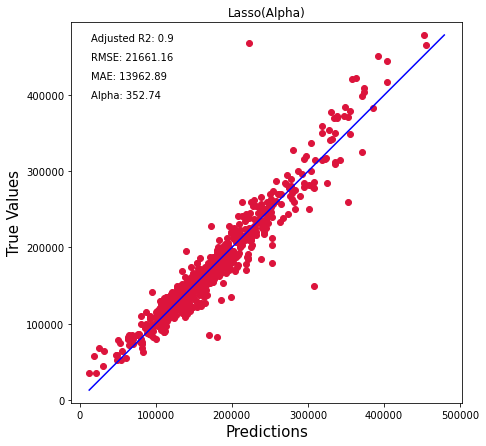

In [8]:
Scores = []
AdjR2 = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Scores.append(Lasso_A_Score)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Lasso(Alpha)')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.annotate('Alpha: ' +str(round(lassocv.alpha_,2)), xy=(0.05, 0.80), xycoords='axes fraction')
    plt.show()
    
    
    

In [9]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE, 'Alpha': Lasso_Alphas})

In [10]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error,Alpha
0,0.923108,0.913062,4.300707e+08,20738.146056,13619.726035,466.301673
1,0.920418,0.910021,3.933109e+08,19832.066540,13345.626010,266.834962
2,0.870873,0.854004,6.998029e+08,26453.788381,14246.047564,352.740116
3,0.915520,0.904483,5.260131e+08,22934.974875,14699.706369,352.740116
4,0.924902,0.915091,4.430997e+08,21049.933088,13729.655424,266.834962
5,0.902726,0.890018,4.564541e+08,21364.785809,13304.418777,201.850863
6,0.872067,0.855354,6.612163e+08,25714.126345,13471.342475,266.834962
7,0.915000,0.903895,4.956510e+08,22263.220149,14157.587039,352.740116
8,0.882030,0.866618,7.138959e+08,26718.830298,14510.992963,266.834962
9,0.923886,0.913943,3.808154e+08,19514.491770,13680.320331,466.301673


In [17]:
combo.to_csv('Lasso(Alpha).csv', index=False)

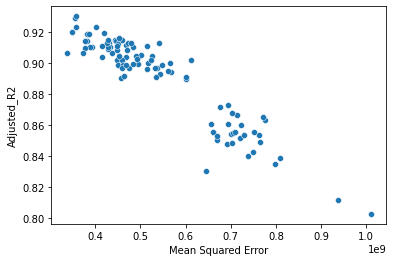

In [11]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

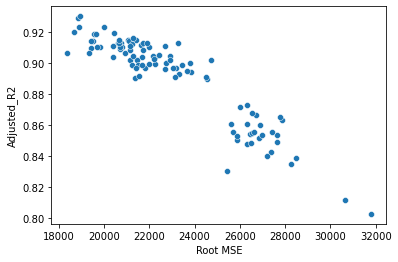

In [12]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

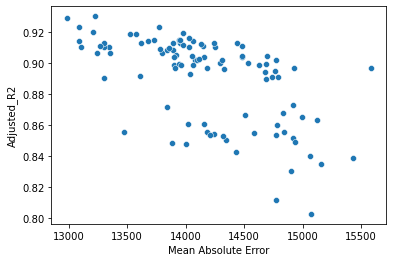

In [13]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

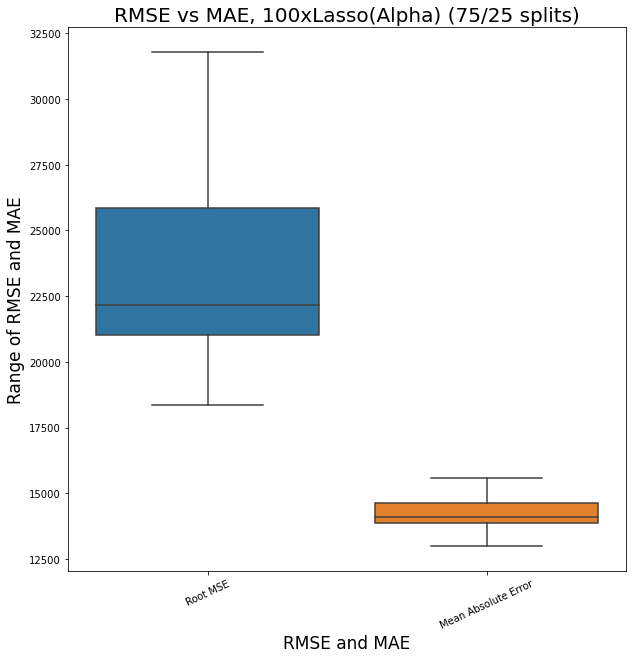

In [14]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xLasso(Alpha) (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

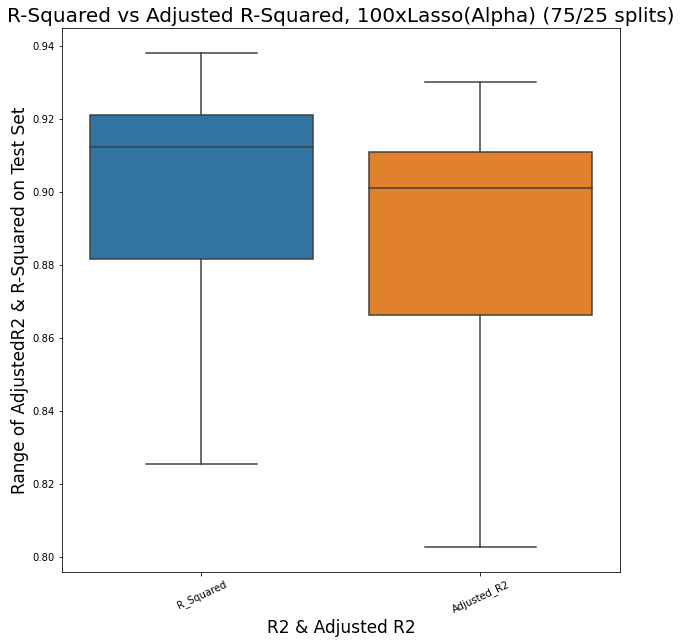

In [15]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xLasso(Alpha) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [16]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error,Alpha
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,0.903137,0.890483,5.412614e+08,23078.174212,14164.196563,360.272370
std,0.024759,0.027994,1.423165e+08,2957.490271,571.083838,114.863662
min,0.825502,0.802704,3.368770e+08,18354.208237,12983.300311,152.692775
25%,0.881713,0.866259,4.416824e+08,21016.159285,13857.009502,266.834962
50%,0.912423,0.900982,4.919612e+08,22180.187397,14108.017295,352.740116
75%,0.921200,0.910906,6.690204e+08,25865.427348,14642.929577,466.301673
max,0.938186,0.930111,1.010729e+09,31791.959484,15584.992838,814.875417
